# Regression Model that Predicts Apple Prices Based on Historical Data

<img src="predict.jpeg" height=400>

##  [Team members](#import)
    1. Keletso Pule
    2. Khomotso Maake
    3. Jacques Stanjaak
    4. Harrison Hlongwane
    5. Bhalisa Sodo
    

# Table Of Contents
### 1. [Introduction](#introduction)

    1. Objective
    2. Parameters
    3. Outline
    
### 2. [Importing Data and Plotting](#import)

    1. Import necessary packages
    2. Import the data into a Pandas Dataframe
    3. Show the data
    4. Make ean initial plot of the data

### 3. [Exploratory Data Analysis](#explore)
### 4. [Split Data: Testing and training](#split)
### 5. [Outliers](#outliers)
### 6. [Regression Model](#regress)
    1. Taking estimates
    2. Least squares
    3. sklearn
### 7. [Conclusion](#conclude)

## 1. Introduction <a name="introduction"></a>
There are various factors that contribute to the performance of a business.  Decisions to improve the performance have to be made given the known knowledge. In this project we are given data of Golden Delicious Apples and some parameters and will be  constructing a regression algorithm that will accurately predict how much a kilogram of the Apples will cost.


### 1.1. Objective 
In this notebook we will design a regression model that will predict the cost of apples based on given parameters.

### 1.2. Parameters
1. Month/Season
2. Distance travelled
3. Supplier cost
4. Grade of apple
5. Demand and Supply
6. Container used?
7. Brand of the apple
8. How ripe/mature the apple is
9. The size of the apple
10. Marketing methods used
11. Competition in the market
12. Cost of apple seedlings



## 2. Importing Data and Plotting <a name="import"></a>

#### 2.1. Import necessary packages

In [2]:
# These packages will be mainly used for data wrangling
import pandas as pd
import numpy as np

# These packages will be mostly used for plotting the data
from matplotlib import pyplot as plt
import seaborn as sns

# These packages will be mostly used to build our linear regression model so that we can make predictions from it.
import statsmodels as sm
import sklearn as skl

#### 2.2. Import the data into a Pandas Dataframe

In [3]:
#import train and test sets into DataFrames
sample_submission = pd.DataFrame(pd.read_csv("sample_submission.csv"))
test_set = pd.DataFrame(pd.read_csv("df-test_set.csv"))
train_set = pd.DataFrame(pd.read_csv("df-train_set.csv"))

In [4]:
#Filter for Commodity of interest in train set
train_set = train_set[train_set["Commodities"]=="APPLE GOLDEN DELICIOUS"]

#### 2.3. Show the data 

##### 2.3.1 Showing the training data

In [5]:
#Viewing the first five rows of our train_set dataframe.
train_set.head() 

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [6]:
#The dataframe has 1952 rows and 13 columns.
train_set.shape

(1952, 13)

In [7]:
#The info method displays the nature of our data i.e datatypes and non-null count.
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


The info summary above shows 1952 entries and it has the following data types: six float type data, two integer type data, five object type data. All columns showing zero null values.

In [8]:
#Summary statistic of each column in the dataframe.
train_set.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


##### 2.3.2. How the  testing data differs from training data

Our Test_set data has 685 rows and 13 columns, our rows are smaller than the train datawhich is expected as the bulk of our data will go into training our model.

The data types also differ in our test data, we have :five float type data, three integer type data, five object type data. All columns showing zero null values.In the training data there are six float type and two integer type data.

Test_set statistics vary from train_set ones as we are working with a smaller data set in our test data.

After veiwing our data, we viewed the sample submission as well to confirm our response variable as the column to feed the submission file on Kaggle.

In [9]:
sample_submission.head()

,Index,avg_price_per_kg
0,1,13.94
1,2,1.30


#### 2.4. Make an initial plot of the data

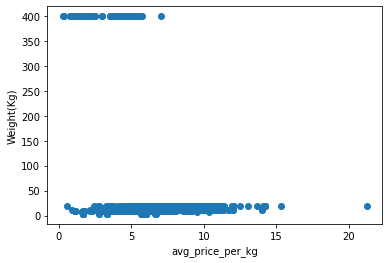

In [10]:
plt.scatter(train_set["avg_price_per_kg"], train_set['Weight_Kg'])
plt.ylabel("Weight(Kg)")
plt.xlabel("avg_price_per_kg")
plt.show()


We note that most of the apples have a low weight and a few have a high weight.

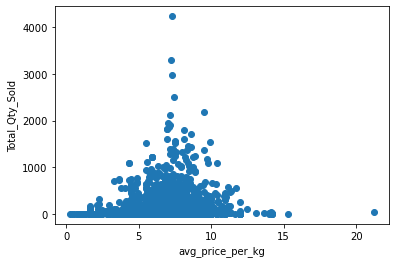

In [11]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Total_Qty_Sold'])
plt.ylabel("Total_Qty_Sold")
plt.xlabel("avg_price_per_kg")
plt.show()


We observe that for most of the average prices the total quantity sold is densley populated between 0-2000. There are a few outliers.

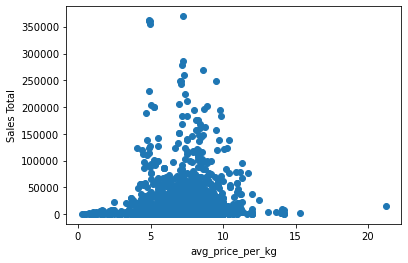

In [12]:
plt.scatter(train_set['avg_price_per_kg'], train_set['Sales_Total'])
plt.ylabel("Sales Total")
plt.xlabel("avg_price_per_kg")
plt.show()



We observe that for most of the average prices the total sales is densley populated between 0-200000. There are a few outliers once again.

## 3. Exploratory Data Analysis <a name="explore"></a>
Make at least 7 plots.

### 3.1. Explore the data shape and types

### 3.2. Look for null values

### 3.3. Univariate analysis - non-graphical

3.3.1 Descriptive statistics of each feature:

In [13]:
train_set.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


3.3.2 Calculating the Kurtosis and Skew of the data:

In [14]:
train_set.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

We observe that all the feautures are highly skewed in the positive direction except for the average price per kg(which is moderately skewed in a positive direction). For the high positive skewed feautures we have that mode<median< mean.

In [15]:
train_set.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

From the above , we observe that all the feautures have a high kurtosis besides the average price per kg. This indicates that all the feautures have a large number of outliers except for the average price.

### 3.4. Univariate analysis - graphical
see Univariate and Multivariate Analysis [Notebook] -Univariate Analysis: Graphical 

### 3.5. Multivariate analysis - non-graphical
see Univariate and Multivariate Analysis [Notebook] - Multivariate Analysis:non-graphical

### 3.6. Multivariate analysis - graphical 
see Univariate and Multivariate Analysis [Notebook] - Multivariate Analysis:  Graphical - Up to completing the Bubble Plot

## 4. Testing the suitability of the data
### 4.1. Testing for linearity

Multiple Linear Regression - Advanced Regression Analysis [Notebook]


#### Import Neccessary Packages

In [16]:
from seaborn import pairplot
from statsmodels.graphics.correlation import plot_corr

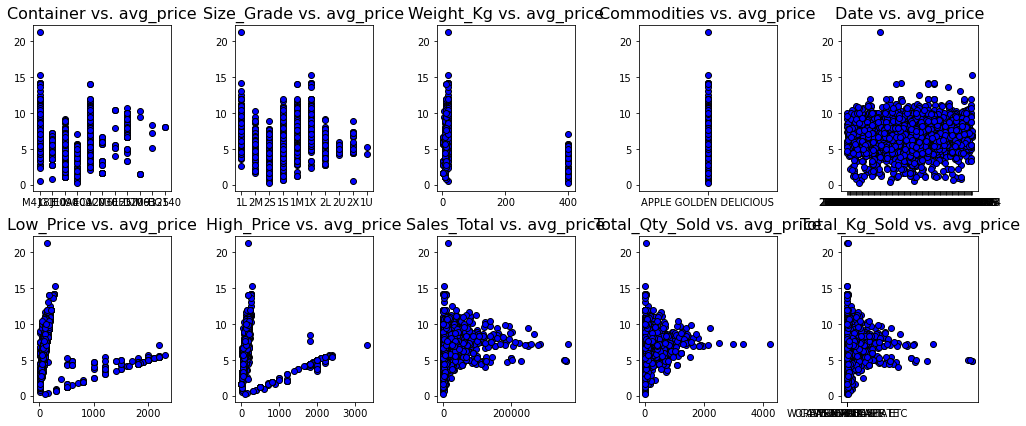

In [17]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.columns):
    if(index<=10):
        axs[index-1].set_title("{} vs. avg_price".format(column),fontsize=16)
        axs[index-1].scatter(x=train_set[column],y=train_set['avg_price_per_kg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

#### Linearity - relationship between each predictor varible and avg_price_per_kg

### 4.2. Testing for multicollinearity

Multiple Linear Regression - Advanced Regression Analysis [Notebook]
Include the corellation heatmap

In [18]:
train1 = train_set.copy()

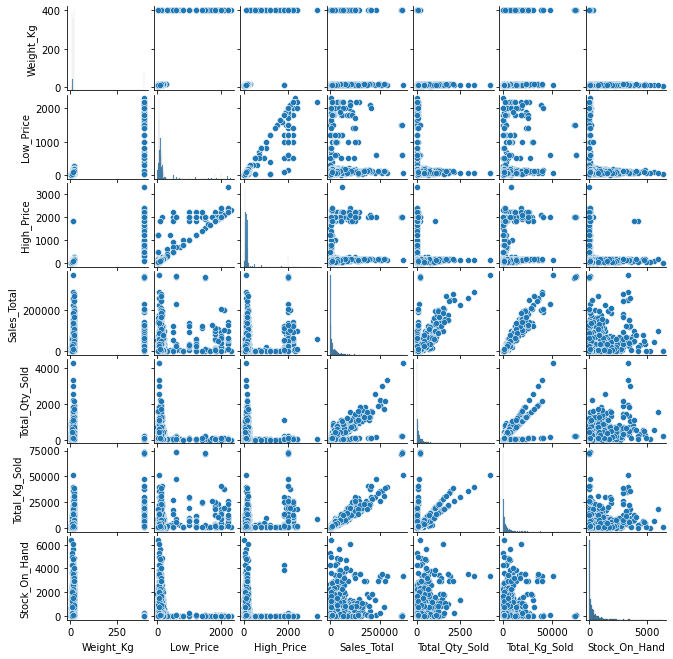

In [19]:
g = pairplot(train1.drop('avg_price_per_kg', axis='columns'))
g.fig.set_size_inches(9,9)

#### Pairwise scatter plot representing n x n matrix with each variable compared against each other

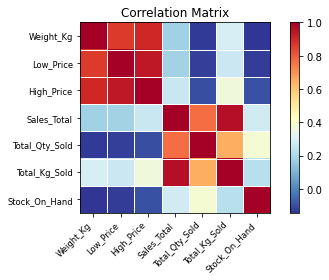

In [20]:
corr = train1.drop('avg_price_per_kg', axis='columns').corr()
fig=plot_corr(corr,xnames=corr.columns)

#### Correlation heatmap showing correclation with each variable agains another in the set

### 5. Transforming the data to be most suitable to use for building a multivariate linear regression model

#### 5.1. Transforming categorical data to numerical data 

In [21]:
#Convert categorical data to numerical data
train=pd.get_dummies(train_set,drop_first=True)

#Replace spaces in column names with underscores
train.columns = train.columns.str.replace(' ','_')

In [22]:
train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN_CAPE,Province_NATAL,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
train.shape

(1952, 179)

In [24]:
cols = list(train)
#Move column to last index
cols.insert(len(cols)-1,cols.pop(cols.index("avg_price_per_kg")))

#Update column names
train = train.loc[:, cols]


In [25]:
train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,...,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,1,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,4.50


## 6. Building the regression models <a name="regress"></a>
### Method 1: A simple linear reggression model following the Least Squares Method
#### Calculating the slope and the intercept 

In [93]:
#Split predictors and response
X = train_set['Weight_Kg']
Y = train_set['avg_price_per_kg']

#Calculating x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

#Calculating Slope
b = sum((X-x_bar) * (Y-y_bar)) / sum((X-x_bar)**2)

#Calculating intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = -0.0076244934807224145
Intercept = 7.0873874015160885


#### Plot our regression line on a scatter plot

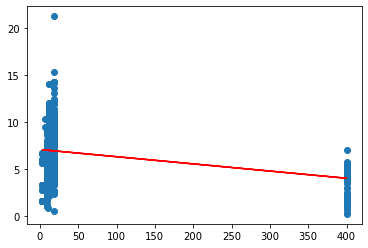

In [27]:
# Define a function to generate values of y from a list of x, 
# Given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)

    return(y_gen)

#Generates y-values for given x-values based on parameters a, b
y_gen2 = gen_y(X, a, b)

#Plot the graph
plt.scatter(X, Y)
plt.plot(X, y_gen2, color='red')
plt.show()

#### Regression for least squres with best fit line

#### Assess our results

In [28]:
errors = np.array(Y - y_gen2)
np.round(errors, 2)

array([ 1.56, -2.45, -0.91, ..., -1.35, -4.22,  0.61])

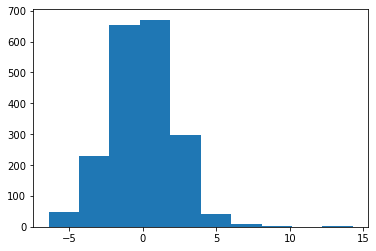

In [29]:
plt.hist(errors)
plt.show()

It seems that our prediction is quote accurate only considering the training data and only considering the weight column as an independent variable. This however is not satisfactory since our model is univariate and multiple conditions need to be taken into account.

In [30]:
# Overall error of the fit
print('Residual Sum of Squares:', (errors ** 2).sum())

Residual Sum of Squares: 8739.552582265216


In [35]:
#Mean Squared Error to assess fit of model
print('MSE:', (1/len(X))*(errors ** 2).sum())

MSE: 4.477229806488328


There is no 'correct' Mean Squared Error. The model's MSE is ~ 4.5 units from a perfect fit (MSE=0).

In [36]:
# R Squared method to assess fit of model
print("R^2:", 1 - (errors**2).sum()/((Y - y_bar)**2).sum())

R^2: 0.11416723112994909


R Squared is closer to 0 than it is to 1. This indicates that the regression does not explain much of the variability in the response.

### Method 2: A multivariate linear regression model using sklearn

#### Show our calculations

In [37]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [38]:
#split predictors and response
X = train.drop(['avg_price_per_kg'], axis = 1)
Y = train['avg_price_per_kg']

In [53]:
# create model object
lm = LinearRegression()

In [54]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [55]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [58]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [60]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [61]:
print("Intercept:", beta_0)

Intercept: 10.179466980467078


In [96]:
beta_js.head(7)

,Coefficient
Weight_Kg,-0.010376
Low_Price,0.000392
High_Price,0.001127
Sales_Total,0.000052
Total_Qty_Sold,-0.001981
Total_Kg_Sold,-0.000262
Stock_On_Hand,-0.000003


#### Plot our results

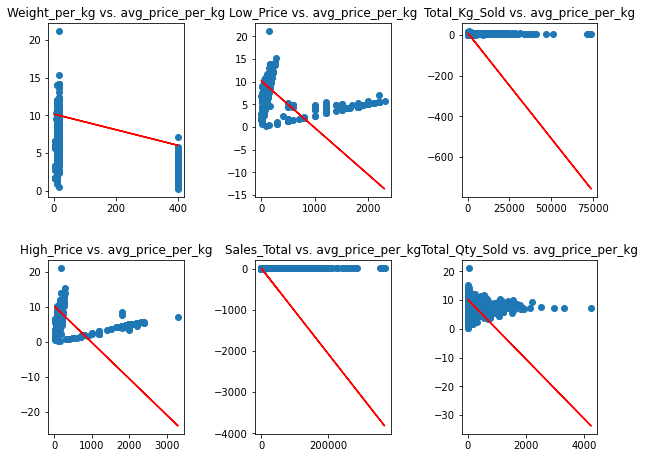

In [100]:
fig, axs = plt.subplots(2, 3, figsize=(9,7))

axs[0,0].scatter(train['Weight_Kg'], train['avg_price_per_kg'])
axs[0,0].plot(train['Weight_Kg'], lm.intercept_ + lm.coef_[0]*train['Weight_Kg'], color='red')
axs[0,0].title.set_text('Weight_per_kg vs. avg_price_per_kg')

axs[0,1].scatter(train['Low_Price'], train['avg_price_per_kg'])
axs[0,1].plot(train['Low_Price'], lm.intercept_ + lm.coef_[0]*train['Low_Price'], color='red')
axs[0,1].title.set_text('Low_Price vs. avg_price_per_kg')

axs[1,0].scatter(train['High_Price'], train['avg_price_per_kg'])
axs[1,0].plot(train['High_Price'], lm.intercept_ + lm.coef_[0]*train['High_Price'], color='red')
axs[1,0].title.set_text('High_Price vs. avg_price_per_kg')

axs[1,1].scatter(train['Sales_Total'], train['avg_price_per_kg'])
axs[1,1].plot(train['Sales_Total'], lm.intercept_ + lm.coef_[0]*train['Sales_Total'], color='red')
axs[1,1].title.set_text('Sales_Total vs. avg_price_per_kg')

axs[1,2].scatter(train['Total_Qty_Sold'], train['avg_price_per_kg'])
axs[1,2].plot(train['Total_Qty_Sold'], lm.intercept_ + lm.coef_[0]*train['Total_Qty_Sold'], color='red')
axs[1,2].title.set_text('Total_Qty_Sold vs. avg_price_per_kg')

axs[0,2].scatter(train['Total_Kg_Sold'], train['avg_price_per_kg'])
axs[0,2].plot(train['Total_Kg_Sold'], lm.intercept_ + lm.coef_[0]*train['Total_Kg_Sold'], color='red')
axs[0,2].title.set_text('Total_Kg_Sold vs. avg_price_per_kg')

fig.tight_layout(pad=3.0)

plt.show()

#### Assess our results

### Method 3: A multivariate linear regression model using statsmodels

#### Show our calculations

In [48]:
#Importing the statsmodels package
import statsmodels.formula.api as sm

When I use all the Columns (179) from train, the dataframe that has our categorical values converted. I get an error that some column are not defined. So I reduced the 179 to work with 13. I got the error that Province W was not defined, so I will be dropping it and recreate my string. These errors only show up when I am constructing the model.

In [44]:
#Creating a copy of the train to work on, so any changes we make do not affect the original dataframe
train2 = train.copy()

In [45]:
#Droping the column from our copy of the train dataframe. 
train2 = train2[train2["Province_W.CAPE-BERGRIVER_ETC"] == 1]
train2 = train2.drop(["Province_W.CAPE-BERGRIVER_ETC"], axis=1)

In [46]:
#Generating the regression string
formula_str = train2.columns[-1]+' ~ '+'+'.join(train2.columns[0:12]); formula_str

'avg_price_per_kg ~ Weight_Kg+Low_Price+High_Price+Sales_Total+Total_Qty_Sold+Total_Kg_Sold+Stock_On_Hand+Province_EASTERN_CAPE+Province_NATAL+Province_ORANGE_FREE_STATE+Province_TRANSVAAL+Province_WEST_COAST'

In [49]:
#Constructing the model using Ordinary Least Squares regression model
model2 = sm.ols(formula = formula_str, data = train2)


In [50]:
#Fitting the OLS model we constructed above
fitted = model2.fit()

In [26]:
#Viewing the fitted model summary
print(fitted.summary())

C:\Users\olive\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     78.51
Date:                Wed, 12 May 2021   Prob (F-statistic):           5.10e-73
Time:                        11:01:13   Log-Likelihood:                -768.59
No. Observations:                 440   AIC:                             1553.
Df Residuals:                     432   BIC:                             1586.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Plot our results

In [29]:
#Importing packages to show how our predictor variables interact with our reponse variable
import statsmodels.api as sm
import matplotlib.pyplot as plt

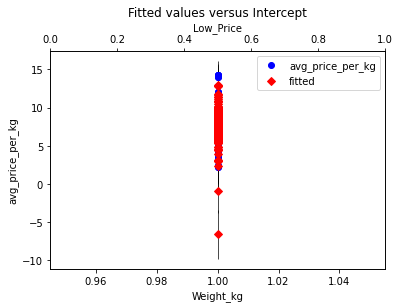

In [50]:
#Ploting the our figure using two x-axes for our predictor variables
fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = ax1.twiny()
fig = sm.graphics.plot_fit(fitted, 0, ax=ax1)
ax.set_ylabel("avg_price_per_kg")
ax1.set_xlabel("Weight_kg")
ax2.set_xlabel("Low_Price")
ax.set_title("Multiple Linear Regression")
plt.show()

#### Assess our results

#### Testing for independence
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


#### Testing for homoscedasticity
Do the magnitude of the risiduals increase as the fitted data increases? This will result in a cone shape and that is called heteroscedasticity. We don’t want that.
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


#### Testing for normality
Multiple Linear Regression - Advanced Regression Analysis [Notebook]
Include the QQ plot


#### Check for outliers in residuals <a name="outliers"></a>
#### Plot Cook’s distance
Multiple Linear Regression - Advanced Regression Analysis [Notebook]


## 7. Conclusion <a name="conclude"></a>

### What we accomplished. 
### What we learnt.
